# Stochastic process and partial differential equations
## Problem description

Now we start to consider the relationship between stochastic process and partial differential equestions (PDE). We start with considering a 2D Itô process,
$$d\mathbf{\mathit{X_t^i}}=\mu\left(\mathbf{\mathit{X_t^i}},t\right) dt + \sigma\left(\mathbf{\mathit{X_t^i}},t\right)d \mathbf{\mathit{B_t^i}}, \ where \  \mathbf{\mathit{X_t^i}}= \left(
\begin{array}{c}
\mathbf{\mathit{X_t^1}}\\
\mathbf{\mathit{X_t^2}}
\end{array} \right)
, \mathbf{\mathit{B_t^i}}= \left(
\begin{array}{c}
\mathbf{\mathit{B_t^1}}\\
\mathbf{\mathit{B_t^2}}
\end{array} \right)
$$
This stands for a random walker waling in the 2D space. Let's draw a image of walking path. For simplicity, we will set the parameters as follows. $$\mathbf{\mu} = \left(\begin{array}{c} 0 \\ 0 \end{array} \right), \mathbf{\sigma} = \left(\begin{array}{cc} 1 & 0  \\ 0 & 1 \end{array} \right) $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

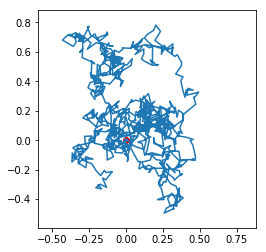

In [42]:
# mu, sigma: average and convariance
# T: total time
# N: time slice
# return order Tx2
def brownian2d(mu, sigma, T=1, N=1000):
    sigma_t = np.sqrt(T/N)
    ds = np.random.normal(0, sigma_t, (N, 2))
    ds = np.dot(ds, sigma) + mu
    return ds

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

#print(brownian2d(mu, sigma, 1, 10))
ret = np.add.accumulate(brownian2d(mu, sigma, N=1000), axis=0)
gca = plt.axes()
gca.set_aspect('equal')
X = ret[:, 0]
Y = ret[:, 1]
xmin, ymin = np.min(ret, axis=0)
xmax, ymax = np.max(ret, axis=0)
plt.xlim(min(xmin, ymin)-0.1, max(xmax, ymax)+0.1)
plt.ylim(min(xmin, ymin)-0.1, max(xmax, ymax)+0.1)
plt.scatter([0], [0], color="r")
plt.plot(X, Y)
plt.show()

This seems quite like a brownian motion. So our exploartion will start from this motion. Consider the [Feynman-Kac formula](https://en.wikipedia.org/wiki/Feynman%E2%80%93Kac_formula) as follows.
$$\partial_t u \left(\mathbf{x}, t\right) + \mu\left(\mathbf{x}, t\right) \partial_x u \left(\mathbf{x}, t\right) + \frac{1}{2} \sigma ^2 \left(\mathbf{x}, t\right)  \partial_{xx} u \left(\mathbf{x}, t\right) - V\left(\mathbf{x}, t\right)u \left(\mathbf{x}, t\right) + f\left(\mathbf{x}, t\right) = 0,\ s.t. \ u \left(\mathbf{x}, T\right) = \psi  \left(\mathbf{x}\right) $$
If we have an Itô process process with the form,
$$d\mathbf{\mathit{X_t^i}}=\mu\left(\mathbf{\mathit{X_t^i}},t\right) dt + \sigma\left(\mathbf{\mathit{X_t^i}},t\right)d \mathbf{\mathit{B_t^i}} $$
Then the fucntion $u \left(\mathbf{x}, t\right)$ should satisfiy the following form,
$$u \left(\mathbf{x}, t\right) = E\left( \int_t^T e^{-\int_t^s V\left(\mathbf{\mathit{X_{s'}}}, s'\right)ds'  }  f\left(\mathbf{\mathit{X_s}}, s\right) ds + e^{-\int_t^T V\left(\mathbf{\mathit{X_{s}}}, s\right)ds } \psi \left(\mathbf{\mathit{X_{T}}}\right) \  \middle\vert \ \mathbf{\mathit{X_t}} = \mathbf{x}\right) $$

Then for a simple diffusion PDE, $ \partial_t u \left(\mathbf{x}, t\right) + \frac{1}{2} \partial_{xx} u \left(\mathbf{x}, t\right) = 0 $, it is just the expectation of walking to some known function values, since $ V\left(\mathbf{\mathit{X_{s}}}, s\right) = 0$. Therefore, 
$u \left(\mathbf{x}, t\right) =  E\left(\psi \left(\mathbf{\mathit{X_{T}}}\right) \  \middle\vert \ \mathbf{\mathit{X_t}} = \mathbf{\mathit{x}}\right) $. This just define the end point as the termination condition. Let us swich side and use $t \mapsto -t$, then the euqation will become $ \partial_t u \left(\mathbf{x}, t\right) - \frac{1}{2} \partial_{xx} u \left(\mathbf{x}, t\right) = 0 $, with $u \left(\mathbf{x}, t\right) =  E\left(\psi \left(\mathbf{\mathit{X_{T}}}\right) \  \middle\vert \ \mathbf{\mathit{X_0}} = \mathbf{\mathit{x}}\right) $. This result is physically obvious, since we can imagine heat has motion like browian. Lets start to simulate this PDE using 2-D random walk.

Consider a circle with $x^2 + y^2 = 1$, with the initial boundary value on the circle equals to 1, while others equals to 0. Therefore we have the boundary conditions 
$$ f\left(x, y\right)$$